In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import regex as re
import wranglerer as wr
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt',delimiter=' ',header=None)
column_names = ['date', 'time', 'page', 'user', 'cohort','ip']
df.columns =column_names

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    900223 non-null  object 
 1   time    900223 non-null  object 
 2   page    900222 non-null  object 
 3   user    900223 non-null  int64  
 4   cohort  847330 non-null  float64
 5   ip      900223 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 41.2+ MB


In [4]:
df['timestamp'] = df.date + ' ' + df.time

In [5]:
df.head()

,date,time,page,user,cohort,ip,timestamp
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,2018-01-26 09:55:03
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2018-01-26 09:56:02
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2018-01-26 09:56:05
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2018-01-26 09:56:06
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018-01-26 09:56:24


In [6]:
df = df.set_index('timestamp')

In [7]:
df.head()

,date,time,page,user,cohort,ip
timestamp,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [8]:
df = df.drop(columns=['date','time'])

In [9]:
df.head()

,page,user,cohort,ip
timestamp,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [10]:
df['user'] = df.user.astype('str')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   page    900222 non-null  object 
 1   user    900223 non-null  object 
 2   cohort  847330 non-null  float64
 3   ip      900223 non-null  object 
dtypes: float64(1), object(3)
memory usage: 34.3+ MB


In [12]:
df.cohort.fillna(10001,inplace=True)

In [13]:
df['cohort'] = df.cohort.astype('int').astype('str')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   page    900222 non-null  object
 1   user    900223 non-null  object
 2   cohort  900223 non-null  object
 3   ip      900223 non-null  object
dtypes: object(4)
memory usage: 34.3+ MB


In [15]:
df.shape

(900223, 4)

In [16]:
df.to_csv('traffic_raw.csv')

In [17]:
wr.summarize(df)

SUMMARY REPORT


Dataframe head: 
                                                    page user cohort  \
timestamp                                                              
2018-01-26 09:55:03                                    /    1      8   
2018-01-26 09:56:02                              java-ii    1      8   
2018-01-26 09:56:05  java-ii/object-oriented-programming    1      8   
2018-01-26 09:56:06   slides/object_oriented_programming    1      8   
2018-01-26 09:56:24            javascript-i/conditionals    2     22   

                               ip  
timestamp                          
2018-01-26 09:55:03  97.105.19.61  
2018-01-26 09:56:02  97.105.19.61  
2018-01-26 09:56:05  97.105.19.61  
2018-01-26 09:56:06  97.105.19.61  
2018-01-26 09:56:24  97.105.19.61  


Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
Index: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  ----

In [18]:
page_df = pd.DataFrame(df.page.value_counts(dropna=False)).reset_index().\
                rename(columns={'index': 'page', 'page': 'count'})

page_df2 = pd.DataFrame((df.page.value_counts(dropna=False))/df.page.count()).reset_index().\
                rename(columns={'index': 'page', 'page': 'proba'})

page_df = page_df.merge(page_df2, on='page')
page_df

,page,count,proba
0,/,50313,0.055890
1,search/search_index.json,19519,0.021682
2,javascript-i,18983,0.021087
3,toc,18297,0.020325
4,java-iii,13733,0.015255
...,...,...,...
2309,12-distributed-ml/6.1-prepare-part-1,1,0.000001
2310,12-distributed-ml/6.4-prepare-part-4,1,0.000001
2311,4-python,1,0.000001
2312,4-python/overview,1,0.000001


In [19]:
user_df = pd.DataFrame(df.user.value_counts(dropna=False)).reset_index().\
                rename(columns={'index': 'user', 'user': 'count'})

user_df2 = pd.DataFrame((df.user.value_counts(dropna=False))/df.user.count()).reset_index().\
                rename(columns={'index': 'user', 'user': 'proba'})

user_df = user_df.merge(user_df2, on='user')
user_df

,user,count,proba
0,11,17913,0.019898
1,64,16347,0.018159
2,53,12329,0.013695
3,314,7783,0.008646
4,1,7404,0.008225
...,...,...,...
976,66,1,0.000001
977,163,1,0.000001
978,918,1,0.000001
979,212,1,0.000001


In [20]:
cohort_df = pd.DataFrame(df.cohort.value_counts(dropna=False)).reset_index().\
                rename(columns={'index': 'cohort', 'cohort': 'count'})

cohort_df2 = pd.DataFrame((df.cohort.value_counts(dropna=False))/df.cohort.count()).reset_index().\
                rename(columns={'index': 'cohort', 'cohort': 'proba'})

cohort_df = cohort_df.merge(cohort_df2, on='cohort')
cohort_df

,cohort,count,proba
0,28,84031,0.093345
1,10001,52893,0.058755
2,33,40730,0.045244
3,29,38096,0.042318
4,62,37109,0.041222
5,53,36902,0.040992
6,24,35636,0.039586
7,57,33844,0.037595
8,56,33568,0.037289
9,51,32888,0.036533


In [21]:
ip_df = pd.DataFrame(df.ip.value_counts(dropna=False)).reset_index().\
                rename(columns={'index': 'ip', 'ip': 'count'})

ip_df2 = pd.DataFrame((df.ip.value_counts(dropna=False))/df.ip.count()).reset_index().\
                rename(columns={'index': 'ip', 'ip': 'proba'})

ip_df = ip_df.merge(ip_df2, on='ip')
ip_df

,ip,count,proba
0,97.105.19.58,284579,0.316121
1,97.105.19.61,61662,0.068496
2,192.171.117.210,9515,0.010570
3,71.150.217.33,6791,0.007544
4,76.185.145.231,4754,0.005281
...,...,...,...
5526,172.58.109.140,1,0.000001
5527,99.203.213.59,1,0.000001
5528,99.203.212.173,1,0.000001
5529,173.239.198.246,1,0.000001


In [22]:
df.groupby(['user', 'cohort']).size()

user  cohort
1     28        5787
      8         1617
10    21         922
100   10001       59
101   12         224
                ... 
979   139        127
98    14          91
980   28           3
981   138         42
99    22         796
Length: 1030, dtype: int64

In [23]:
p_a_and_b = df.groupby(['user', 'cohort']).size()/len(df)

In [24]:
p_a_and_b

user  cohort
1     28        0.006428
      8         0.001796
10    21        0.001024
100   10001     0.000066
101   12        0.000249
                  ...   
979   139       0.000141
98    14        0.000101
980   28        0.000003
981   138       0.000047
99    22        0.000884
Length: 1030, dtype: float64

In [25]:
p_b = df.groupby('user').size()/len(df)

In [26]:
p_b

user
1      0.008225
10     0.001024
100    0.000066
101    0.000249
102    0.000089
         ...   
979    0.000141
98     0.000101
980    0.000003
981    0.000047
99     0.000884
Length: 981, dtype: float64

In [27]:
p_a_and_b / p_b

user  cohort
1     28        0.781605
      8         0.218395
10    21        1.000000
100   10001     1.000000
101   12        1.000000
                  ...   
979   139       1.000000
98    14        1.000000
980   28        1.000000
981   138       1.000000
99    22        1.000000
Length: 1030, dtype: float64

In [28]:
# Given a particular user, what is probability of a certain cohort
cohort_given_user = (
    df.groupby('user')\
    .cohort.value_counts(normalize=True)\
    .rename('proba_cohort_given_user')\
    .reset_index())
cohort_given_user

,user,cohort,proba_cohort_given_user
0,1,28,0.781605
1,1,8,0.218395
2,10,21,1.000000
3,100,10001,1.000000
4,101,12,1.000000
...,...,...,...
1025,979,139,1.000000
1026,98,14,1.000000
1027,980,28,1.000000
1028,981,138,1.000000


In [29]:
cohort_given_user[cohort_given_user.proba_cohort_given_user < 1]

,user,cohort,proba_cohort_given_user
0,1,28,0.781605
1,1,8,0.218395
13,11,28,0.847318
14,11,1,0.152682
23,118,23,0.969856
...,...,...,...
912,88,10001,0.419072
913,88,12,0.012547
914,88,11,0.007528
931,895,137,0.983784


In [30]:
df[df.user == '88'].sort_values(by='cohort', ascending=False)

,page,user,cohort,ip
timestamp,,,,
2021-01-29 23:32:35,content/html-css,88,7,136.50.6.131
2019-04-15 13:01:32,content/php_ii,88,7,66.90.173.188
2019-04-15 13:08:29,content/php_iv/php-with-mysql,88,7,66.90.173.188
2019-04-15 13:02:14,content/php_iv/php-with-mysql/connect-to-db.html,88,7,66.90.173.188
2019-04-15 13:02:10,content/php_iv/php-with-mysql/prepared-stateme...,88,7,66.90.173.188
...,...,...,...,...
2019-07-22 13:07:58,3-sql/1-mysql-overview,88,10001,173.173.127.101
2019-07-22 13:07:57,1-fundamentals/1-fundamentals-overview,88,10001,173.173.127.101
2019-07-22 13:07:49,2-stats/3.1-descriptive-stats,88,10001,173.173.127.101


In [31]:
df[df.user == '88'].groupby('cohort').size()

cohort
10001    334
11         6
12        10
7        447
dtype: int64

In [32]:
df = df.reset_index().merge(cohort_given_user, on=['user', 'cohort'], 
                            how='left').fillna(value=0).set_index('timestamp')

In [33]:
df[df.proba_cohort_given_user < 0.005]

,page,user,cohort,ip,proba_cohort_given_user
timestamp,,,,,
2020-01-18 09:52:57,html-css/css-i/box-model,64,10001,12.106.208.194,0.001529
2020-01-18 09:52:58,/,64,10001,12.106.208.194,0.001529
2020-01-18 09:53:00,html-css/css-i/box-model,64,10001,12.106.208.194,0.001529
2020-01-18 09:55:43,/,64,10001,12.106.208.194,0.001529
2020-01-18 09:55:44,html-css/css-i/box-model,64,10001,12.106.208.194,0.001529
2020-01-18 09:57:15,html-css/css-i/box-model,64,10001,12.106.208.194,0.001529
2020-01-18 09:57:16,/,64,10001,12.106.208.194,0.001529
2020-01-18 09:58:08,html-css/css-i/box-model,64,10001,12.106.208.194,0.001529
2020-01-18 09:58:12,html-css/css-i/box-model,64,10001,12.106.208.194,0.001529


In [34]:
df.groupby('page').count()

,user,cohort,ip,proba_cohort_given_user
page,,,,
0,1,1,1,1
%20https://github.com/RaulCPena,1,1,1,1
',1,1,1,1
",%20https://github.com/RaulCPena",1,1,1,1
.git,1,1,1,1
...,...,...,...,...
web-dev-day-two,2,2,2,2
where,1,1,1,1
working-with-time-series-data,15,15,15,15


### 7 Lessons least accessed

In [35]:
page_df[(page_df['count'] == 1)]

,page,count,proba
1856,ml-methodologies-drawing.jpg,1,0.000001
1857,javascript-i/html-css,1,0.000001
1858,',1,0.000001
1859,json-responses,1,0.000001
1860,content/examples/git/gitbook/images/favicon.ico,1,0.000001
...,...,...,...
2309,12-distributed-ml/6.1-prepare-part-1,1,0.000001
2310,12-distributed-ml/6.4-prepare-part-4,1,0.000001
2311,4-python,1,0.000001
2312,4-python/overview,1,0.000001


### 1 Page attract most traffic across cohorts

In [36]:
df.groupby(['page', 'cohort']).size()

page                              cohort
0                                 55         1
%20https://github.com/RaulCPena   55         1
'                                 28         1
,%20https://github.com/RaulCPena  55         1
.git                              24         1
                                            ..
where                             137        1
working-with-time-series-data     28         1
                                  59        14
wp-admin                          22         1
wp-login                          22         1
Length: 14678, dtype: int64

In [37]:
page_counts = pd.DataFrame(df.groupby(['page', 'cohort']).size().rename('count'))

In [38]:
page_counts.to_csv('pagecount.csv')

In [39]:
p_a_and_b = df.groupby(['page', 'cohort']).size()/len(df)
p_b = df.groupby('page').size()/len(df)

In [40]:
p_a_and_b / p_b

page                              cohort
0                                 55        1.000000
%20https://github.com/RaulCPena   55        1.000000
'                                 28        1.000000
,%20https://github.com/RaulCPena  55        1.000000
.git                              24        1.000000
                                              ...   
where                             137       1.000000
working-with-time-series-data     28        0.066667
                                  59        0.933333
wp-admin                          22        1.000000
wp-login                          22        1.000000
Length: 14678, dtype: float64

In [41]:
# Given a particular page, what is probability of a certain cohort
cohort_given_page = (
    df.groupby('page')\
    .cohort.value_counts(normalize=True)\
    .rename('proba_cohort_given_page')\
    .reset_index())
cohort_given_page

,page,cohort,proba_cohort_given_page
0,0,55,1.000000
1,%20https://github.com/RaulCPena,55,1.000000
2,',28,1.000000
3,",%20https://github.com/RaulCPena",55,1.000000
4,.git,24,1.000000
...,...,...,...
14673,where,137,1.000000
14674,working-with-time-series-data,59,0.933333
14675,working-with-time-series-data,28,0.066667
14676,wp-admin,22,1.000000


In [42]:
cohort_given_page[cohort_given_page.proba_cohort_given_page < 1].sort_values('proba_cohort_given_page')

,page,cohort,proba_cohort_given_page
55,/,9,0.000020
53,/,4,0.000020
54,/,5,0.000020
12945,search/search_index.json,11,0.000051
12946,search/search_index.json,15,0.000051
...,...,...,...
1442,5-regression/exercises,28,0.960000
2047,9-anomaly-detection/3-detecting-timeseries-ano...,28,0.961538
2148,9.5_DBSCAN_to_detect_anomalies.md,10001,0.979167
2139,9.4_DBSCAN_to_detect_anomalies,10001,0.980000


In [48]:
user_cnt = df.groupby('user')[['page','ip','cohort']].nunique()

,page,ip,cohort
user,,,
1,976,35,2
10,144,33,1
100,20,3,1
101,86,3,1
102,48,2,1
...,...,...,...
979,20,7,1
98,48,1,1
980,1,1,1


In [46]:
cohort_cnt = df.groupby('cohort')[['page','user','ip']].nunique()

In [47]:
cohort_cnt

,page,user,ip
cohort,,,
1,342,18,46
10001,1112,78,413
11,95,5,14
12,117,5,8
13,348,10,43
132,273,23,143
133,230,17,202
134,239,20,131
135,248,31,95


In [51]:
df.groupby('user').datetime.min()

AttributeError: 'DataFrameGroupBy' object has no attribute 'datetime'

In [54]:
page_views = df.groupby('user')['page'].agg(['count','nunique'])

In [58]:
page_views

,count,nunique
user,,
1,7404,976
10,922,144
100,59,20
101,224,86
102,80,48
...,...,...
979,127,20
98,91,48
980,3,1


<AxesSubplot:>

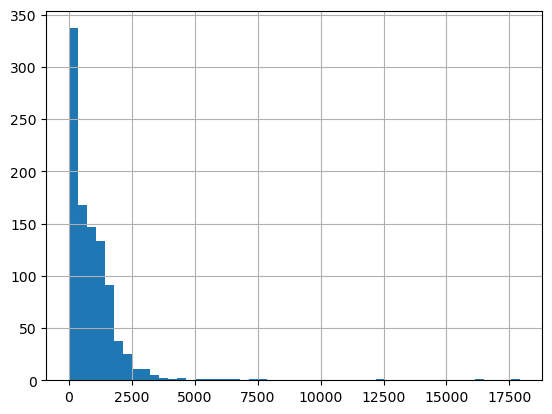

In [57]:
page_views['count'].hist(bins=50)

In [60]:
page_views[(page_views['count'] < 600)& (page_views['nunique'] > 190)]

,count,nunique
user,,
313,270,194
51,592,194


In [ ]:
scaler = MinMaxScaler().fit(page_views)
scaler.transform

In [ ]:
d_clusts = DBSCAN(eps=0.1,min_samples=15)
d_clusts.fit(scaled_pages)

In [ ]:
d_clusts.labels_

In [ ]:
page_views['cluster_assigned'] = d_clusts.labels_

In [ ]:
page_views[page_views['cluster_assigned'] != 0]